# Customer Churn Prediction in Telecommunication: Proactive Strategies for Sustainable Growth

## Introduction

In the dynamic world of telecommunications, customer churn remains a pressing challenge for companies striving to achieve sustained success. Customers have alot of options and evolving preferences, accurately predicting churn has become important to retain and satisfy them. Customer churn is basically the loss of customers.

In this project, we use Supervised Machine Learning (classification) to explore the significance of churn analytics as a strategic tool for telecommunication companies to proactively identify potential risk factors for churn, optimize retention efforts, and cultivate lasting customer relationships. By leveraging data-driven insights and advanced analytics, companies can gain a competitive edge and ensure sustainable growth in an ever-changing industry.

## 1. Business Understanding
The churn analytics predictive model is a data-driven solution designed to address the persistent challenge of customer churn in subscription-based industries. This model aims to identify customers at risk of churn, enabling businesses to take proactive measures and implement targeted retention strategies. 

The primary objective is to reduce customer churn rates and retain valuable customers by providing insights into customer behavior, preferences, and patterns. Utilizing machine learning models such as logistic regression and decision trees, the model evaluates the data to build accurate predictions. 

Its performance is assessed through metrics like accuracy, precision, recall and F1-score. Armed with the model's insights, businesses can create personalized offers, marketing campaigns, and proactive customer support initiatives, thus improving customer satisfaction and fostering loyalty. 

### Hypothesis

**Null Hypothesis (H0)**:
"There is no significant relationship between customer service interactions, engagement with value-added services, and tenure with customer churn in the telecom company."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between customer service interactions, engagement with value-added services, and tenure with customer churn in the telecom company."

### Research Questions

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges?

3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

4. How does the presence of online security influence churn rates? Are customers with online security services less likely to churn compared to those without it?

5. Are there significant differences in churn behavior between customers who have device protection and those who don't?

6. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

7. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

8. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?




## 2. Data Understanding

#### Importing and Installing necessary modules and libraries for the model

In [ ]:
# %pip install pyodbc
# %pip install python-dotenv 
# %pip install openpyxl

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [34]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

## Data Loading
### Accessing first dataset from the database
The first 3000 records of the dataset can be found in a remote database.

-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

The second dataset (2000 records) is already available as a .xlsx file. **This is the test dataset**

The third dataset is already available as a .csv file.

In [ ]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER=tcp:{server};DATABASE={database};UID={username};PWD={password}"

In [ ]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [ ]:
# Get the cursor
cursor = connection.cursor()

# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')

# Fetch all the table names
tables = table_names.fetchall()

# Print the table names
for table in tables:
    print(table.table_name)

LP2_Telco_churn_first_3000
trace_xe_action_map
trace_xe_event_map


In [ ]:
# sql query to get the data

query = "SELECT * FROM LP2_Telco_churn_first_3000"
data=pd.read_sql(query,connection)

In [52]:
#load data on local
data = pd.read_csv('LP2_Telco_churn_first_3000.csv')

In [53]:
# preview the data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [ ]:
# save to csv

data.to_csv('LP2_Telco_churn_first_3000.csv', index=False)

In [55]:
# Load Telco second 2000 data with openpyxl

data_xls = pd.read_excel('Telco-churn-second-2000.xlsx')
data_xls.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [56]:
# this is our test dataset to be used later

data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [ ]:
# save to csv

data_xls.to_csv ("Telco-churn-second-2000.csv", 
                  index = None,
                  header=True)

In [82]:
# load and preview last dataset

data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [59]:
data.shape

(3000, 21)

In [60]:
data_xls.shape

(2000, 20)

In [61]:
data2.shape

(2043, 21)

The following describes the columns present in the data:

1. **Gender** -- Whether the customer is a male or a female

2. **SeniorCitizen** -- Whether a customer is a senior citizen or not

3. **Partner** -- Whether the customer has a partner or not (Yes, No)

4. **Dependents** -- Whether the customer has dependents or not (Yes, No)

5. **Tenure** -- Number of months the customer has stayed with the company

6. **Phone Service** -- Whether the customer has a phone service or not (Yes, No)

7. **MultipleLines** -- Whether the customer has multiple lines or not

8. **InternetService** -- Customer's internet service provider (DSL, FiberOptic, No)

9. **OnlineSecurity** -- Whether the customer has online security or not (Yes, No, No Internet)

10. **OnlineBackup** -- Whether the customer has online backup or not (Yes, No, No Internet)

11. **DeviceProtection** -- Whether the customer has device protection or not (Yes, No, No internet service)

12. **TechSupport** -- Whether the customer has tech support or not (Yes, No, No internet)

13. **StreamingTV** -- Whether the customer has streaming TV or not (Yes, No, No internet service)

14. **StreamingMovies** -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

15. **Contract** -- The contract term of the customer (Month-to-Month, One year, Two year)

16. **PaperlessBilling** -- Whether the customer has paperless billing or not (Yes, No)

17. **Payment Method** -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

18. **MonthlyCharges** -- The amount charged to the customer monthly

19. **TotalCharges** -- The total amount charged to the customer

20. **Churn** -- Whether the customer churned or not (Yes or No)

#### Issues with data
-  First 3000 dataset and last 2000 dataset need to be merged, however they have inconsistent Dtypes that need to be synchronized
-  We need to remove the Customer ID column as it is not necessary for our analysis
-  Missing values in First 3000 dataset need to be sorted out
-  TotalCharges Column needs to be changed to numeric Dtype

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [63]:
# Drop Customer ID column

data.drop(columns='customerID', inplace=True)


In [64]:
# change seniorCitizen column form bool to int64
# (0 for False and 1 for True)
data['SeniorCitizen'] = data['SeniorCitizen'].astype('Int64')

In [65]:
# convert bool columns to object Dtypes

bool_to_obj = {'Partner': object, 
               'Dependents': object, 
               'PhoneService': object,
               'PaperlessBilling': object}

data = data.astype(bool_to_obj)

In [66]:
# Replace True and False values with Yes and No in Object columns

replace_values = {True: 'Yes', False: 'No'}

# Use replace() method
data['Partner'] = data['Partner'].replace(replace_values)
data['Dependents'] = data['Dependents'].replace(replace_values)
data['PhoneService'] = data['PhoneService'].replace(replace_values)
data['MultipleLines'] = data['MultipleLines'].replace(replace_values)
data['OnlineSecurity'] = data['OnlineSecurity'].replace(replace_values)
data['OnlineBackup'] = data['OnlineBackup'].replace(replace_values)
data['DeviceProtection'] = data['DeviceProtection'].replace(replace_values)
data['TechSupport'] = data['TechSupport'].replace(replace_values)
data['StreamingTV'] = data['StreamingTV'].replace(replace_values)
data['StreamingMovies'] = data['StreamingMovies'].replace(replace_values)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(replace_values)
data['Churn'] = data['Churn'].replace(replace_values)

In [67]:
# unique values in target column (Churn)

data['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [68]:
# check for missing values

data['Churn'].isna().sum()

1

In [69]:
# Drop missing value in the Churn column

data.dropna(subset='Churn', inplace=True)

In [70]:
data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [71]:
# view the missing values in TotalCharges column

data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,NaN,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No


The missing values in **TotalCharges** have a **tenure** of 0, even though there are values in the **MonthlyCharges** column. We can simply drop those rows

In [72]:
# Drop rows where tenure = 0

data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [73]:
# replace the remaining missing values with the mode of their respective columns

columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies']

for column in columns_to_replace:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2994 non-null   object 
 1   SeniorCitizen     2994 non-null   Int64  
 2   Partner           2994 non-null   object 
 3   Dependents        2994 non-null   object 
 4   tenure            2994 non-null   int64  
 5   PhoneService      2994 non-null   object 
 6   MultipleLines     2994 non-null   object 
 7   InternetService   2994 non-null   object 
 8   OnlineSecurity    2994 non-null   object 
 9   OnlineBackup      2994 non-null   object 
 10  DeviceProtection  2994 non-null   object 
 11  TechSupport       2994 non-null   object 
 12  StreamingTV       2994 non-null   object 
 13  StreamingMovies   2994 non-null   object 
 14  Contract          2994 non-null   object 
 15  PaperlessBilling  2994 non-null   object 
 16  PaymentMethod     2994 non-null   object 


In [75]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [84]:
# Drop Customer ID column
data2.drop(columns='customerID', inplace=True)

In [85]:
# change Dtype of TotalCharges column from object to numeric
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')

In [86]:
# merge the test datasets
Data_All= pd.concat([data, data2], ignore_index=True)
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5037 non-null   object 
 1   SeniorCitizen     5037 non-null   Int64  
 2   Partner           5037 non-null   object 
 3   Dependents        5037 non-null   object 
 4   tenure            5037 non-null   int64  
 5   PhoneService      5037 non-null   object 
 6   MultipleLines     5037 non-null   object 
 7   InternetService   5037 non-null   object 
 8   OnlineSecurity    5037 non-null   object 
 9   OnlineBackup      5037 non-null   object 
 10  DeviceProtection  5037 non-null   object 
 11  TechSupport       5037 non-null   object 
 12  StreamingTV       5037 non-null   object 
 13  StreamingMovies   5037 non-null   object 
 14  Contract          5037 non-null   object 
 15  PaperlessBilling  5037 non-null   object 
 16  PaymentMethod     5037 non-null   object 


In [87]:
# view Missing Values in TotalCharges column

Data_All[np.isnan(Data_All['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3212,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4664,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4748,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


We have some more missing values in **TotalCharges** columns. Let us delete the rows with a **tenure** of 0

In [88]:
# Drop rows where tenure = 0

Data_All.drop(labels=Data_All[Data_All['tenure'] == 0].index, axis=0, inplace=True)

In [89]:
# check unique values of each column
for column in Data_All.columns:
    # print('Column: {:-<50} - Unique Values: {}'.format(column, Data_All[column].unique()))
    print(f'{column:-<50} {Data_All[column].unique()}')

gender-------------------------------------------- ['Female' 'Male']
SeniorCitizen------------------------------------- <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
tenure-------------------------------------------- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No' 'Yes' 'No phone service']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection----------------------

In [90]:
Data_All.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5034.0,5034.000000,5034.000000,5034.000000
mean,0.162694,32.620580,65.107251,2300.954758
std,0.369123,24.511015,30.068019,2268.346402
min,0.0,1.000000,18.400000,18.799999
25%,0.0,9.000000,35.799999,417.662498
50%,0.0,29.000000,70.599998,1401.000000
75%,0.0,56.000000,90.050003,3860.599976
max,1.0,72.000000,118.650002,8670.100000


## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

First we look at the churn rates in the dataset

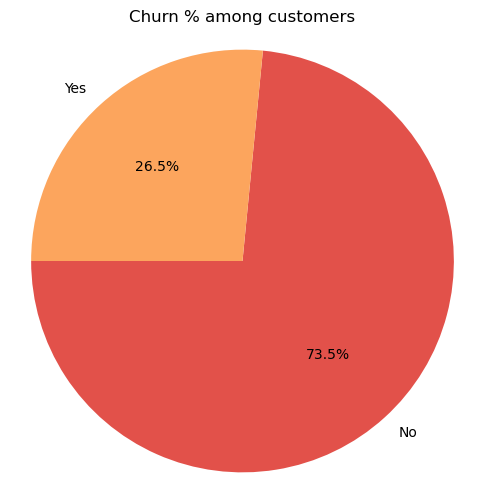

In [91]:
churn_data = Data_All['Churn'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('Spectral')
plt.pie(churn_data, labels=churn_data.index, autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn % among customers')
plt.show()

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

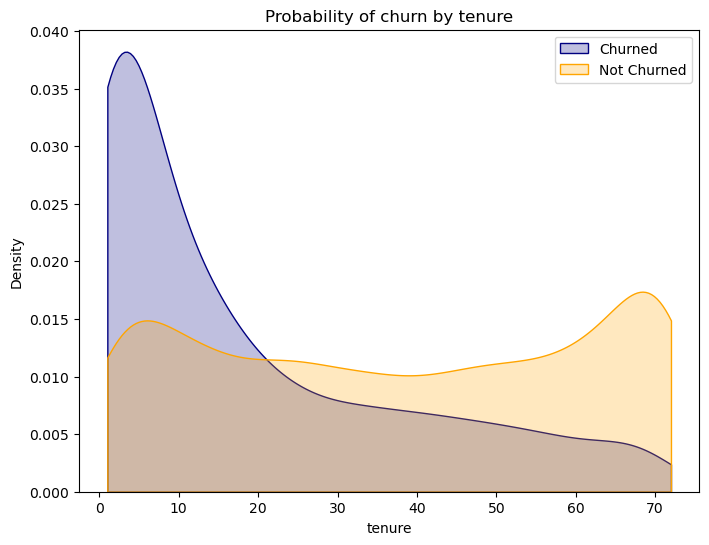

In [92]:
# We use a probability density distribution to show distribution of churn related to tenure

def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of churn by tenure')
    ax0= sns.kdeplot(Data_All[Data_All['Churn'] == 'Yes'][x], color='navy', label='Churn:Yes', fill =True, cut=0)
    ax1= sns.kdeplot(Data_All[Data_All['Churn'] == 'No'][x], color='orange', label='Churn:No', fill=True, cut=0)
    plt.legend(['Churned', 'Not Churned'], loc='upper right')
kdeplot('tenure')

- Customers with a lower tenure (recent customers) are more likely to churn.
- Customers on a longer tenure are less likely to churn.

In [ ]:
# for col in Data_All.select_dtypes('object'):
#     plt.figure(figsize=(8,6))
#     sns.set_palette('Spectral')
#     Data_All[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)
#     plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
#     plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

*1 Relationship the feature betwen target variable

*** 1-1 Chun / Gender

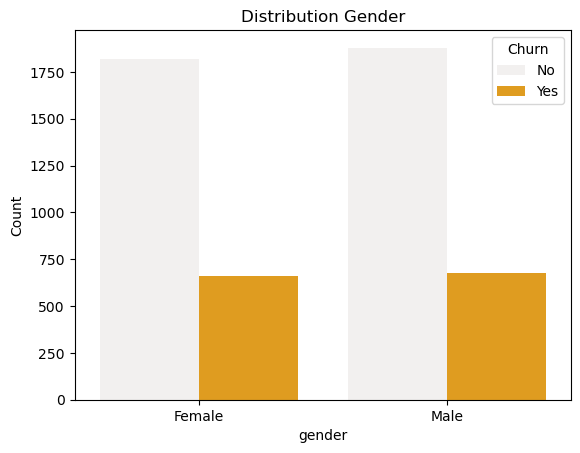

In [97]:
sns.countplot(x='gender',data=Data_All,hue='Churn',color='orange')
plt.title('Distribution Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

this graphe show the number of gender.We san the same proportion the number of gender said No and same for those said Yes.We are only two gender female and male

##### *** 1-2 Chun / Tenure 

In [140]:
Data_All

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5033,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5034,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5035,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


<Axes: title={'center': 'Number Churn by tenure'}, xlabel='tenure', ylabel='count'>

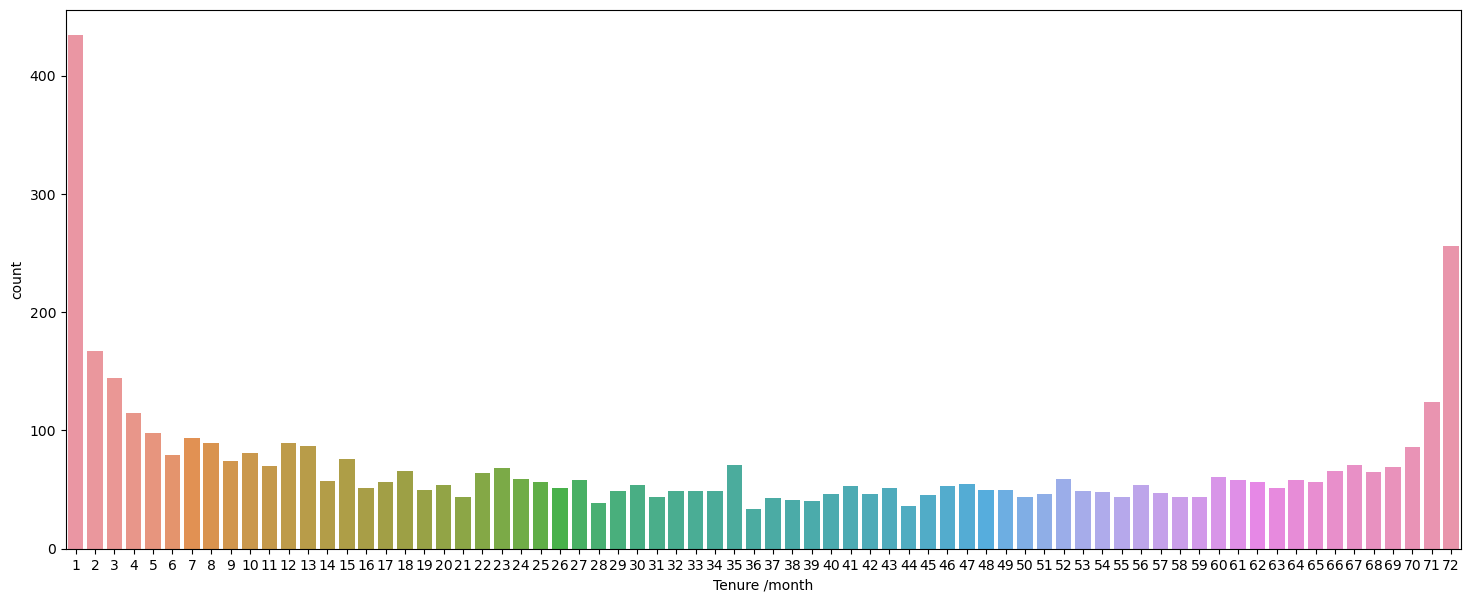

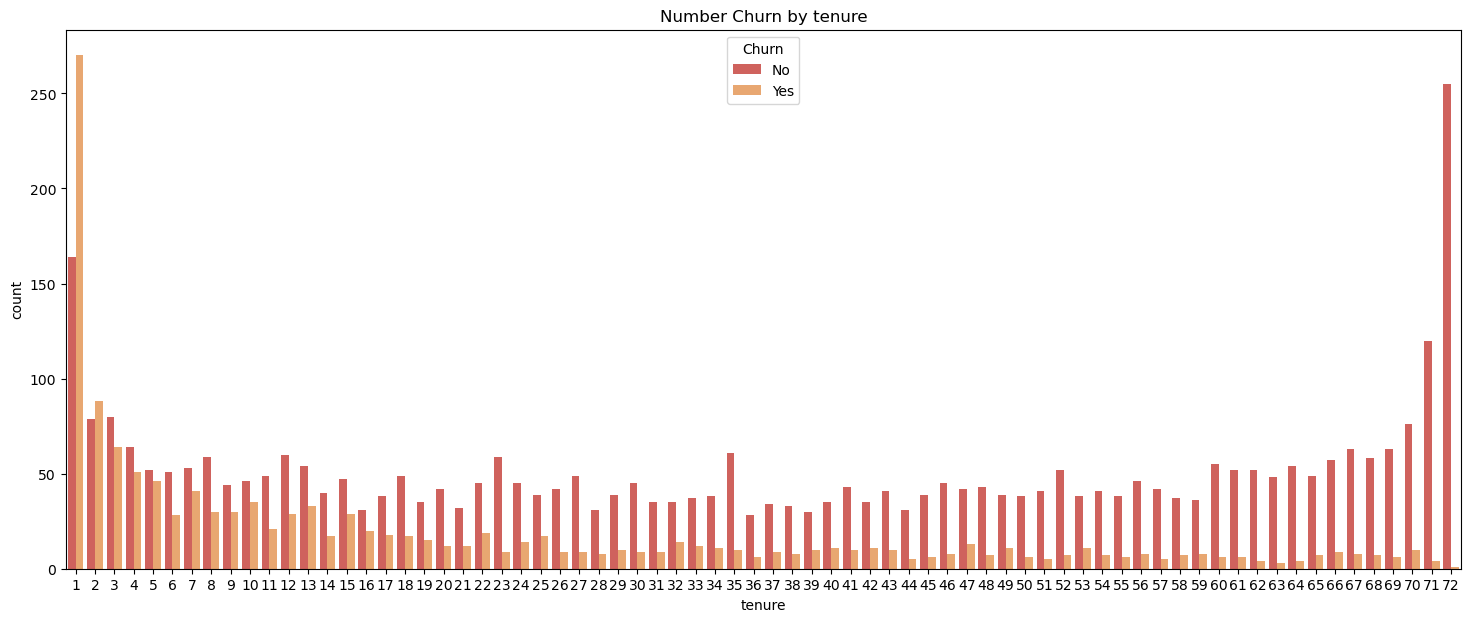

In [153]:

plt.figure(figsize=(18,7))
sns.countplot(x='tenure', data=Data_All)
plt.xlabel('Tenure /month')
plt.ylabel('count')
plt.figure(figsize=(18,7))
plt.xlabel('Tenure /month')
plt.ylabel('Number Churn')
plt.title('Number Churn by tenure')
sns.countplot(x='tenure', hue='Churn', data=Data_All)


the graph shows a large number of customers in the first month, but this gradually decreases from the second to the 6th month, from more than 400 to less than 100.
Then undergoes a random variation beyond the 6th month until the 68th month to gradually increase from the 69th month to the 72nd month.
We have the same variation for the number of customers leaving the company.
For example for the first month we have more than 400 subscribers but among these subscribers more than 250 give up only less than 200 remain.
But we also see that the more the number of months of subscription increases, the more customers remain loyal to the example company
from the 68th month to the 72nd month it goes from 50 to more than 230 subscribers against less than 10 to less than 5 who leave

##### *** 1-2 Chun / TotalCharges 

In [151]:
data_senior = Data_All['SeniorCitizen'].value_counts(normalize=True)
data_senior

0    0.837306
1    0.162694
Name: SeniorCitizen, dtype: Float64

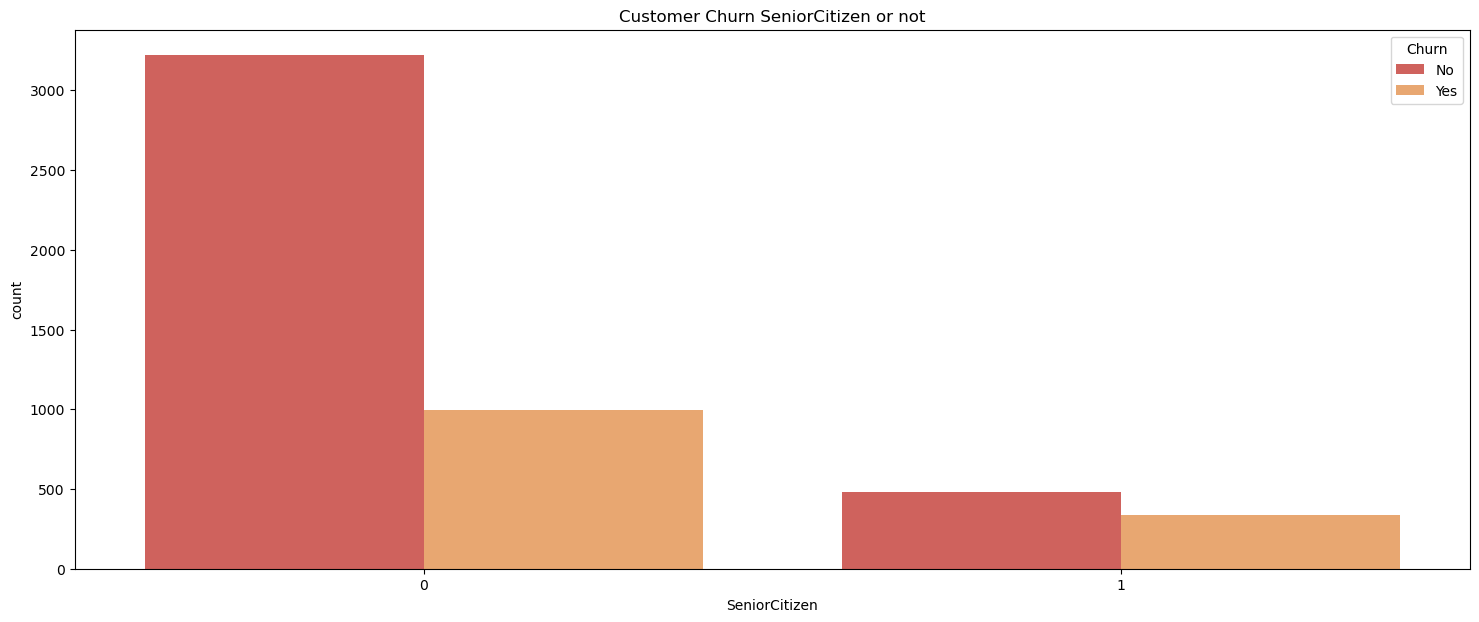

In [149]:
plt.figure(figsize=(18,7))
plt.title("Customer Churn SeniorCitizen or not")
sns.countplot(x=Data_All['SeniorCitizen'],hue=Data_All['Churn']) 

 Here we are more 80% of customers are not a SeniorCitizen and the number of client who not quict is more important that those quict

### Relationship Chun and Qualitatif variable

##### We can visualize the relationship on heatmap

<Axes: xlabel='Partner', ylabel='Churn'>

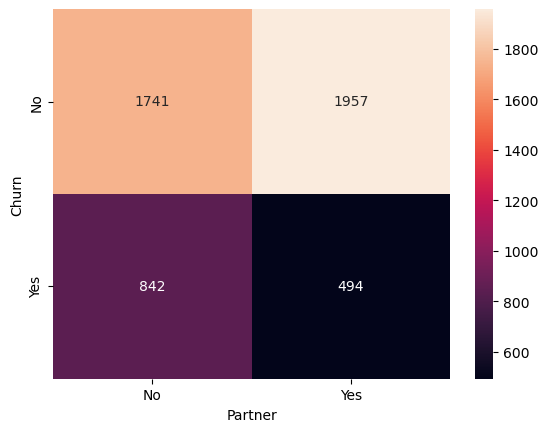

In [170]:
plt.figure()
sns.heatmap(pd.crosstab(Data_All['Churn'],Data_All['Partner']),annot=True,fmt='d')

 * Churn / Partner : we are 494 of partner who quict of 842 who aren't partner


1- 2 Relationship Churn / Dependents

<Axes: xlabel='Dependents', ylabel='Churn'>

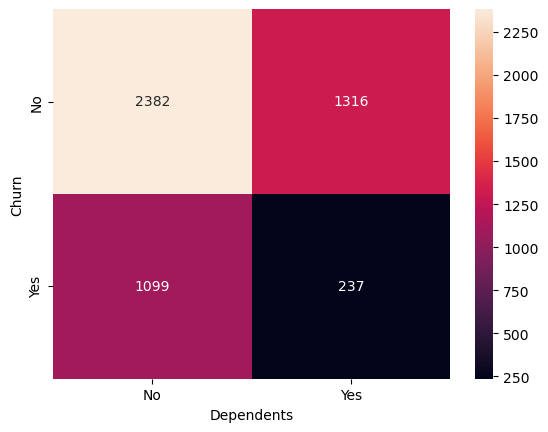

In [171]:
plt.figure()
sns.heatmap(pd.crosstab(Data_All['Churn'],Data_All['Dependents']),annot=True,fmt='d')


* Churn / Dependents : here the majoratory customer quict are the not dependents more 1099 quict of only 237 who are dependent

RelationShip Churn  / Phoneservice

<Axes: xlabel='PhoneService', ylabel='Churn'>

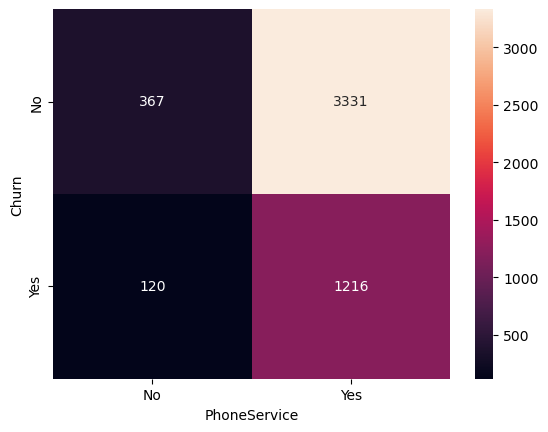

In [173]:
plt.figure()
sns.heatmap(pd.crosstab(Data_All['Churn'],Data_All['PhoneService']),annot=True,fmt='d')

*  Churn / PhoneService : we seing here the customer with PhoneService  quict more than customer no PhoneService

Relationship Churn / MultipleLines

<Axes: xlabel='MultipleLines', ylabel='Churn'>

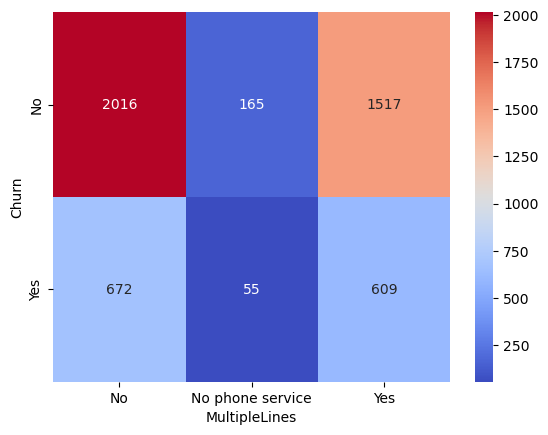

In [178]:
plt.figure()
sns.heatmap(pd.crosstab(Data_All['Churn'],Data_All['MultipleLines']),annot=True,fmt='d',cmap='coolwarm')

* Churn / MultipleLines : we are the same value to customer we are multipline and no multiple line so we are a little customer we are no phone service multipleline quict around 55 


Relationship Churn / InternetService

<Axes: xlabel='InternetService', ylabel='Churn'>

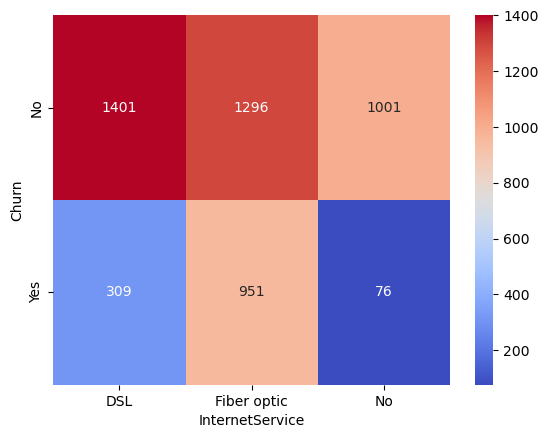

In [176]:
plt.figure()
sns.heatmap(pd.crosstab(Data_All['Churn'],Data_All['InternetService']),annot=True,fmt='d',cmap='coolwarm')

* Churn  / Internet Service : Many customer who churn are fiber optic  InternetService We are some people who are not InternetsERVICE and churn


* - Churn / OnlineSecurity -: 


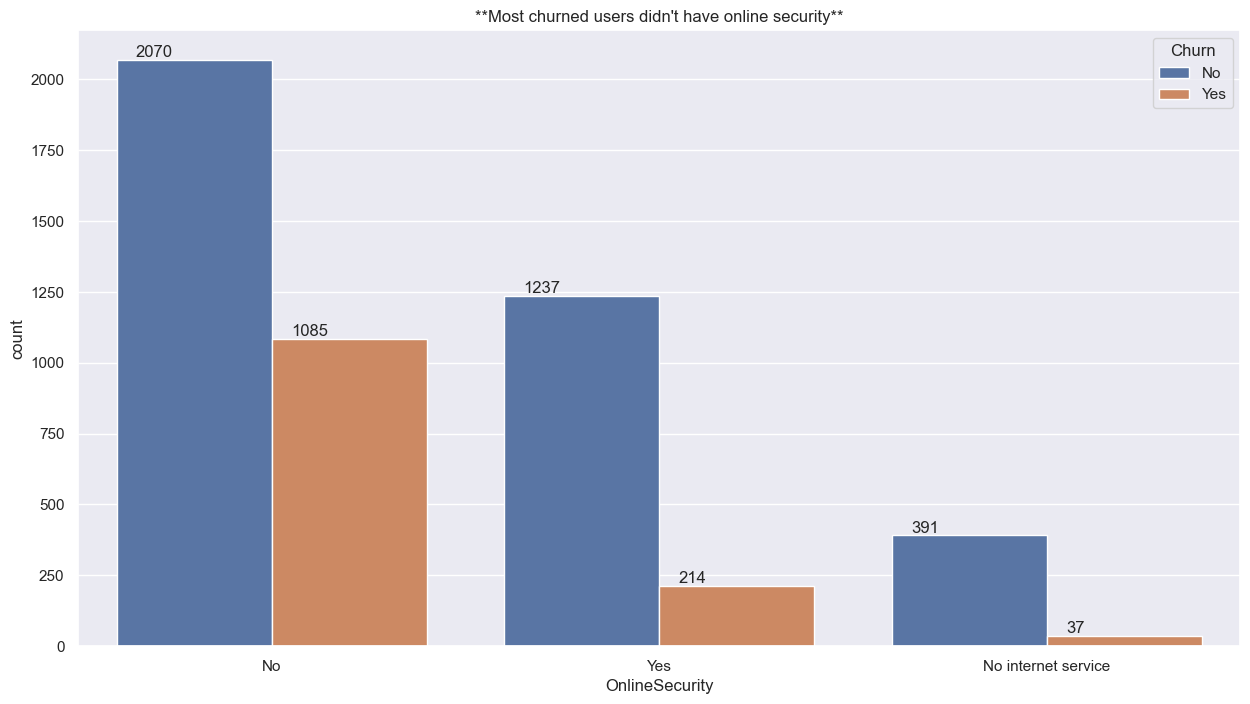

In [184]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=Data_All)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.title("**Most churned users didn't have online security**")
plt.show()

Churn / StreamingTV

In [189]:
df_streaming = Data_All.groupby(['StreamingTV','Churn']).size().reset_index()
df_streaming['percentage'] =Data_All.groupby(['StreamingTV','Churn']).size().groupby(level=0).apply(lambda x: 100* x /float(x.sum())).values
df_streaming.columns = ['StreamingTV','Churn','Counts','Percentage']

fig = px.bar(df_streaming,x='StreamingTV',y='Counts',color='Churn',color_discrete_map={
    'Yes': '#99d594',
    'No': '#FC8D59',
    },
    text = df_streaming['Percentage'].apply(lambda x : '{0:1.2f}%'.format(x)))
display(fig)


###### 
###### *  Churn/OnlineBackup - : 
###### * Churn /DeviceProtection : 
###### * - Churn /TechSupport : 





* Relationship 
For that let's check the correlation betwen column

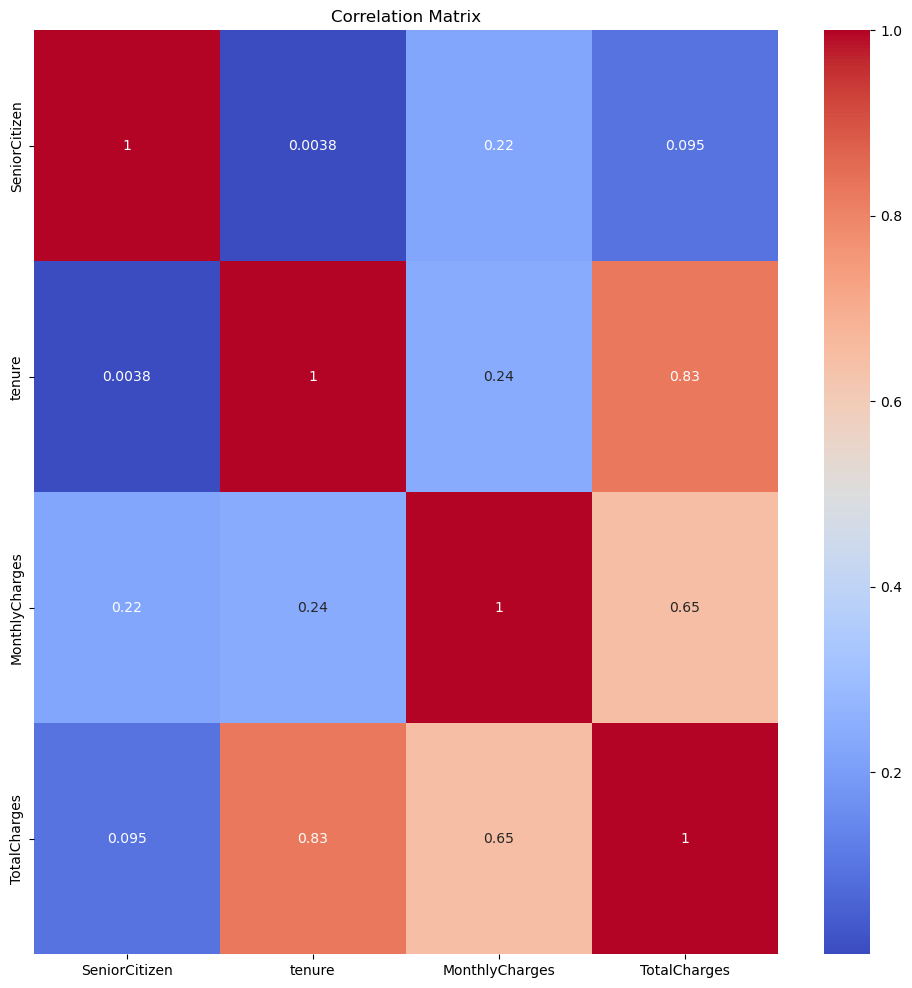

In [76]:
plt.figure(figsize=(12,12))
sns.heatmap(Data_All.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [156]:
Data_All.corr() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.003816,0.221767,0.095487
tenure,0.003816,1.000000,0.239642,0.826188
MonthlyCharges,0.221767,0.239642,1.000000,0.646813
TotalCharges,0.095487,0.826188,0.646813,1.000000


 we can see they are a big correlation with some columns :
* Tenure/TotalCharge with 0.82
* MonthlyCharges / TotalCharges 0.64 

And we are a little correlation with some column:
* SeniorCitizen / tenure ,MonthlyCharge,TotalCharges
* tenure / MontlyCharge 

Make Visualization to see

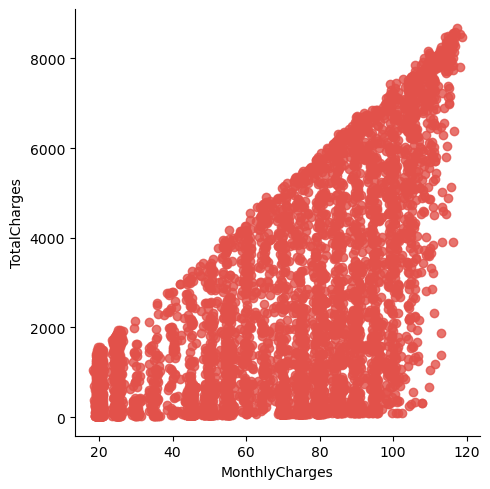

In [74]:
sns.lmplot(data=Data_All, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


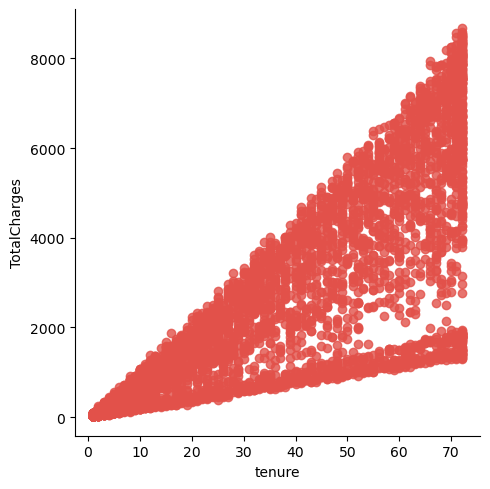

In [75]:
sns.lmplot(data=Data_All, x='tenure', y='TotalCharges', fit_reg=False)


For the visualization 
We can see MonthlyCharges and tenure grow function TotalCharge 

In [183]:
# https://stackoverflow.com/a/65242391/11105356

df_g = Data_All.groupby(['StreamingTV', 'Churn']).size().reset_index()
df_g['percentage'] = Data_All.groupby(['StreamingTV', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['StreamingTV', 'Churn', 'Counts', 'Percentage']

fig = px.bar(df_g, x='StreamingTV', y='Counts', 
       color='Churn',
       color_discrete_map={
        'Yes': '#99D594',
        'No': '#FC8D59',
    }, 
    text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

display(fig)
print("**Similar ratio between streamer vs non-streamer in churned users**")

**Similar ratio between streamer vs non-streamer in churned users**


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [865]:
#...

## Drop Duplicates

In [866]:
# Use pandas.DataFrame.drop_duplicates method

## Dataset Splitting

In [867]:
# Use train_test_split with a random_state, and add stratify for Classification

## Impute Missing Values

In [868]:
# Use sklearn.impute.SimpleImputer

## New Features Creation

In [869]:
# Code here

## Features Encoding

In [870]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Features Scaling

In [871]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

In [872]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [873]:
# Code here

### Train the Model

In [874]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [875]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [876]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [877]:
# Code here

### Train the Model

In [878]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [879]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [880]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [881]:
# Code here

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [882]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [883]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app